$$
\newcommand{theorem}{\textbf{Theorem: }}
\newcommand{proof}{\textbf{Proof: }}
\newcommand{example}{\textbf{Example: }}
\newcommand{lemma}{\textbf{Lemma: }}
\newcommand{corollary}{\textbf{Corollary: }}
\newcommand{prop}{\textbf{Proposition: }}
$$

$$
\newcommand{v}{\mathbf}
\newcommand{inv}{^{-1}}
\newcommand\mat[1]{\begin{pmatrix}#1\end{pmatrix}} 
\newcommand\det[1]{\left| #1\right|} 
\newcommand\norm[1]{\lVert #1\rVert} 
\newcommand\set[1]{\left\{#1\right\}} 
\newcommand\dels[2]{\frac{\partial #1}{\partial #2}} 
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Population modelling

## Malthus model

Consider the population of a country over time, $N(t)$.

Let $B$ be the _birth rate per capita_, that is the number of babies born per second, for each individual.
Similarly, let $D$ be the death rate per capita.

Suppose that $B$ is a constant, _ie_ everyone gives birth to the same ratio of babies no matter the size of population.
Similarly, we assume that $D$ is constant.

Then the change in population $\delta N$, over the period $\delta t$, (assuming no other factors), is:
$$
\delta N = \text{number of birth} - \text{number of death} = B N\delta t - D N\delta t = (B - D) N\delta t
$$

Therefore, as $\delta t \to 0$,
$$
\frac{\delta N}{d t} = (B - D) N
$$

From this,we get:
$$
\begin{align*}
\frac{\delta N}{d t} &= (B - D) N \\
\Rightarrow \frac{1}{N} \delta N &= (B - D) dt \\
\Rightarrow \int \frac{1}{N} \delta N &= \int (B - D) dt \\
\Rightarrow  \ln N &= (B - D)t + C \\
\Rightarrow  N &= e^{(B - D)t + C} = e^C e^{(B - D)t} \\
\Rightarrow  N &= N_0 e^{kt} 
\end{align*}
$$

where $N_0 = e^C$ is the initial population at $t = 0$, and $k = B - D$.


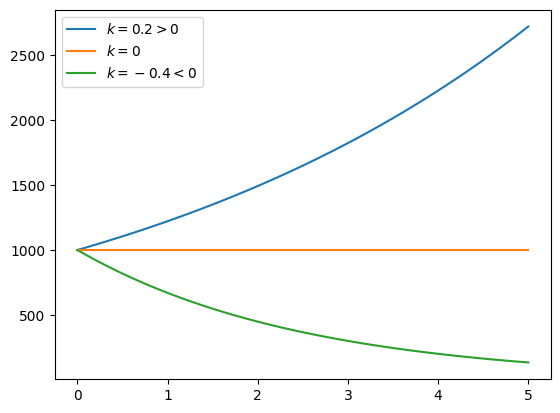

In [2]:
ts = np.linspace(0, 5)
k1 = 0.2
k2 = 0
k3 = -0.4
N0 = 1000

plt.plot(ts, N0 * np.exp(k1 * ts), label=f"$k = {k1} > 0$")
plt.plot(ts, N0 * np.exp(k2 * ts), label=f"$k = {k2}$")
plt.plot(ts, N0 * np.exp(k3 * ts), label=f"$k = {k3} < 0$")
plt.legend();
plt.show();

However, looking at the behaviour of this model, either the population remains completely stagnant, explodes astronomically, or dies off.

This does not reflect how real life population behaves.


## Logistic model

We now refine our model.
Suppose that, $D$ is a function of $N$.
To avoid population explosion, we would need this be an increasing function of $N$, but there are so many to choose.

Thus, we choose the simplest on, $D = sN$ for some constant $s$.

Going back to our equation, we get:
$$
\frac{dN}{dt} = BN - DN = BN - sN^2
$$

Solving this, we get:
$$
\begin{align*}
\frac{dN}{dt} &=  BN - sN^2 \\
\Rightarrow dt &= \frac{1}{BN - sN^2} dN  \\
\Rightarrow \int dt &= \int \frac{1}{BN - sN^2} dN \\
\Rightarrow t &= \int \frac{1}{BN - sN^2} dN\\
&= \int \frac{1}{BN} + \frac{s}{B^2 - sNB} dN \quad \text{separation of fraction} \\
&= \frac{1}{B} \ln N - \frac{1}{B} \ln |B - sN| + C
\end{align*}
$$

---

We need to make a loose assumption that $B \neq sN$, otherwise we would be dividing by $0$.

Then we assume for now that $B > sN$, thus we get:
$$
\begin{align*}
t &=\frac{1}{B} \ln N - \frac{1}{B} \ln |B - sN| + C \\
&= \frac{1}{B} \ln N - \frac{1}{B} \ln (B - sN) + C \\
\Rightarrow (t + C)B &= \ln \frac{N}{B - sN} \\
\Rightarrow \frac{N}{B - sN} &= e^{(t + C)B}  \\
\Rightarrow N &= \frac{B e^{(t + C)B}}{1 + se^{(t + C)B}} \\
&= \frac{B}{s + e^{-(t + C)B}} \\
\end{align*}
$$

Since $N_0 = \frac{B}{s + e^{-CB}} \Rightarrow e^{-CB} = \frac{B}{N_0} - s$, the solution simplifies to:
$$
N = \frac{B}{s + e^{-(t + C)B}} = \frac{B}{s + \left(\frac{B}{N_0} - s \right) e^{-Bt}}
$$


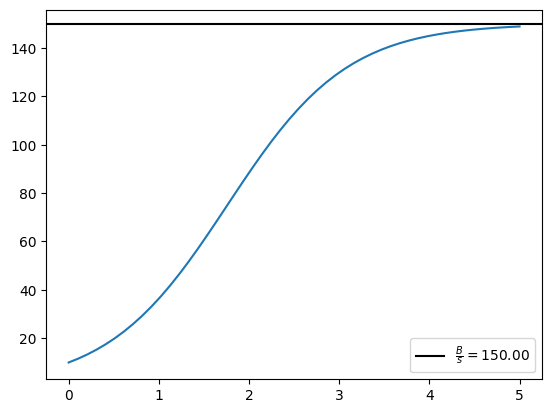

In [3]:
s = 0.01
B = 1.5
N0 = 10

plt.plot(ts, B / (s + (B / N0 - s) * np.exp(-B * ts)))
plt.axhline(y = B / s, color = 'black', label = r"$\frac{B}{s} = " + f"{B/s:.2f}$")
plt.legend();
plt.show();

Notice that from $\frac{dN}{dt} = BN - sN^2$, $\frac{dN}{dt} = 0 \Rightarrow BN - sN^2 = 0 \Rightarrow N = \frac{B}{s}$, which is our population maximum.

This is known as the **logistic curve**.

$N(t)$ is the logistic function, and $\frac{dN}{dt} = BN - sN^2$ is the logistic equation.

This have the behaviour that there is an initial population boom.
But over time, the death rate increases until it reaches a population limit.
Notably, this is an "S-shaped" curve.

---

Now, we consider $B < sN$, thus we get:

$$
\begin{align*}
t &=\frac{1}{B} \ln N - \frac{1}{B} \ln |B - sN| + C \\
&= \frac{1}{B} \ln N - \frac{1}{B} \ln (sN - B) + C \\
& \cdots \\
N &= \frac{B}{s - \left(s - \frac{B}{N_0} \right) e^{-Bt}}
\end{align*}
$$


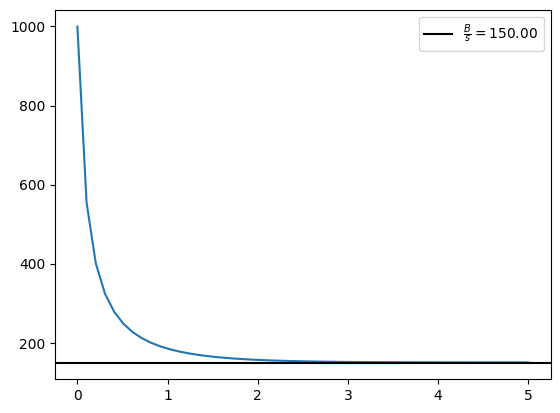

In [4]:
N0 = 1000

plt.plot(ts, B / (s - (s - B / N0) * np.exp(-B * ts)))
plt.axhline(y = B / s, color = 'black', label = r"$\frac{B}{s} = " + f"{B/s:.2f}$")
plt.legend();
plt.show();

Now instead, our population drops until it reaches a limit.

This models the situation where the initial population is too large be sustain, thus there are many deaths until the population reaches a sustainable level.

$\frac{B}{s}$ is known as the **carrying capacity/sustainable population**, which is the value of $N$ as $t \to \infty$.

Plotting these together, we can see that either the population increases to the limit, or dwindles to it, depending on the starting population.

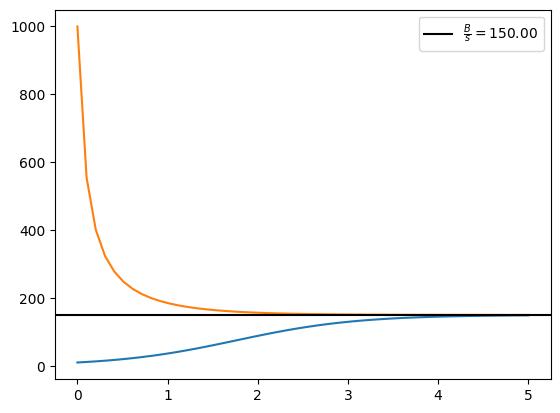

In [5]:
N0 = 10
N0_p = 1000

plt.plot(ts, B / (s - (s - B / N0) * np.exp(-B * ts)))
plt.plot(ts, B / (s - (s - B / N0_p) * np.exp(-B * ts)))
plt.axhline(y = B / s, color = 'black', label = r"$\frac{B}{s} = " + f"{B/s:.2f}$")
plt.legend();
plt.show();

---

Recall that we have assumed $B \neq sN$.

Now what happens when $B = sN$?

Then:
$$
\frac{dN}{dt} = BN - sN^2  = sN^2 - sN^2 = 0
$$

Which means our initial population is stable, hence our model works even in this case.

## External forces

Suppose that our population is now affected by some external source.
_ie_:
$$
\frac{dN}{dt} = BN - sN^2 - E
$$

Which means our population reduces by a constant $E$ every time period.

This could be people emigrating out of the country, or animals being hunted over time.

Notice that $BN - sN^2 - E$ is a quadratic formula, thus it can have either 0, 1 or 2 roots with respect to $N$.

### No roots

This happens when $B^2 - 4sE < 0 \Rightarrow E > \frac{B^2}{4s}$.

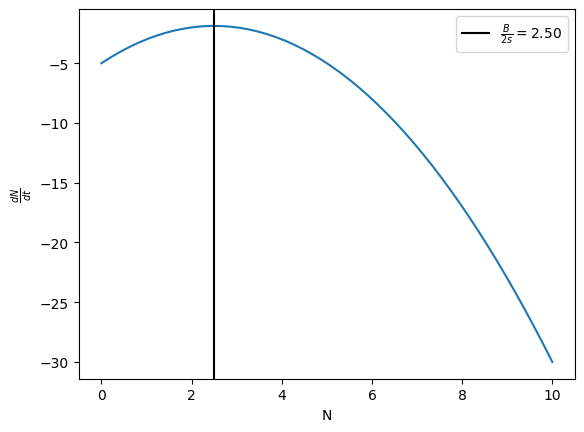

In [6]:
Ns = np.linspace(0, 10)
s = 0.5
B = 2.5
E = 5

plt.plot(Ns, B * Ns - s * Ns * Ns - E)
plt.xlabel("N")
plt.ylabel(r"$\frac{dN}{dt}$")
plt.axvline(x = B / (2 * s), color = 'black', label = r"$\frac{B}{2s} = " + f"{B/(2*s):.2f}$")
plt.legend()
plt.show();

Notice that $\frac{dN}{dt}$ is always negative.
Thus, we would expect our population always be decreasing.
The rate of decrease will increase up till $\frac{B}{2s}$, before slowing down.

Ultimately, it would wipe out our population.

Thus, this rules out the value of $E > \frac{B^2}{4s}$ if we wish to sustain the population.

### Two roots

This happens when $B^2 - 4sE > 0 \Rightarrow E < \frac{B^2}{4s}$.

Since there are 2 places where $\frac{dN}{dt} = 0$, there are 2 equilibriums.

Now the curve is more interesting:


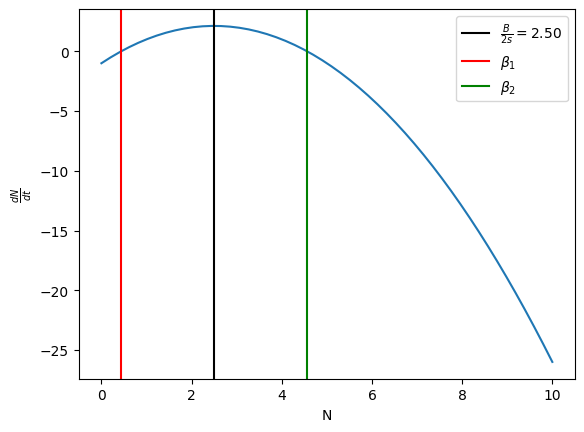

In [7]:
Ns = np.linspace(0, 10)
s = 0.5
B = 2.5
E = 1

plt.plot(Ns, B * Ns - s * Ns * Ns - E)
plt.xlabel("N")
plt.ylabel(r"$\frac{dN}{dt}$")
plt.axvline(x = B / (2 * s), color = 'black', label = r"$\frac{B}{2s} = " + f"{B/(2*s):.2f}$")
plt.axvline(x = (B - np.sqrt(B**2 - 4 * E * s)), color = "red", label = r"$\beta_1$")
plt.axvline(x = (B + np.sqrt(B**2 - 4 * E * s)), color = "green", label = r"$\beta_2$")
plt.legend()
plt.show();

where
$$
\beta_1 =  \frac{B - \sqrt{B^2 - 4Es}}{2s} \quad
\beta_2 =  \frac{B + \sqrt{B^2 - 4Es}}{2s}
$$

In order words:
$$
\frac{dN}{dt} 
\begin{cases}
 < 0 \quad \text{if } 0 < N < \beta _1 
\\ > 0 \quad \text{if } \beta_1 < N < \beta _2 
\\ < 0 \quad \text{if } N  > \beta_2
\end{cases}
$$

Indeed, we can see it from the graph of population over time.

(Note that we are plotting the values computationally rather deriving the formula, since it gets rather complex)


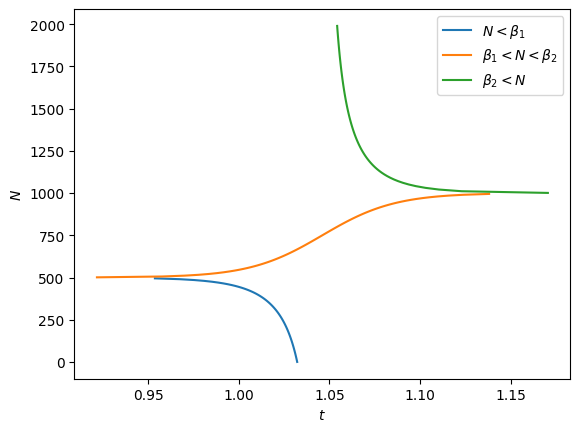

In [8]:
s = 0.1
B = 150
E = 50000

X1 = (B + np.sqrt(B**2 - 4 * E * s))/2
X2 = -E / X1
A2 = 1 / (s * X2 + X1)
A1 = s * A2
Ns = np.linspace(0, 500, num=100, endpoint=False)
N2s = np.linspace(501, 1000, num=100, endpoint=False)
N3s = np.linspace(1001, 2000, num=100, endpoint=False)

def get_times(Ns):
    return np.log(np.power(np.abs(X1 - s * Ns), -A1 / s) * np.power(np.abs(X2 + Ns), A2)) + 1

ts = get_times(Ns)
t2s = get_times(N2s)
t3s = get_times(N3s)

plt.plot(ts, Ns, label=r"$N < \beta_1$")
plt.plot(t2s, N2s, label=r"$\beta_1 < N <\beta_2$")
plt.plot(t3s, N3s, label=r"$\beta_2 < N$")
plt.xlabel("$t$")
plt.ylabel("$N$")
plt.legend()
plt.show()

<details>
    <summary style="color: blue">$\text{Derivation}$ (Click to expand)</summary>
    <div style="background: aliceblue">
        <p>
	When we follow similarly to our previous computations, we would arrive at trying to compute the following:
	$$
	t = \int \frac{1}{-sN^2 + BN - E} dN 
	$$
	We, once gain, try to factorize it,
	$$
	\begin{gather*}
	-sN^2 + BN - E = (X_1 - sN)(N + X_2) \\
	\Rightarrow
	X_1 - X_2s = B \\
	X_1 + \frac{Es}{X_1} = B \\
	X_1^2 + Es = BX_1 \\
	X_1 = \frac{B \pm \sqrt{B^2 - 4Es}}{2} \\
	X_2 = -\frac{E}{X_1} \\
	\end{gather*}
	$$
	We then separate the fraction,
	$$
	\begin{gather*}
	\frac{X_1 -sN}{N + X_2} = \frac{A_1}{X_1 - sN} + \frac{A_2}{N + X_2} \\
	A_1N + A_1 X_2 + A_2 X_1 - sA_2N = 1\\
	A_1 = sA_2\\
	A_1 X_2 + A_2 X_1 = 1\\
	sX_2A_2 + A_2 X_1 = 1\\
	A_2 = \frac{1}{sX_2 + X_1}\\
	\end{gather*}
	$$
	Evaluating the integral:
	$$
	\begin{gather*}
	t = A_1 \ln N - A_2 \ln |B - sN| + C \\
	t = \ln \frac{N^{A_1}}{|B - sN|^{A_2}} + C \\
	\end{gather*}
	$$
        which are the parameters which we are plotting.
        </p>
    </div>
</details>

Hence, there are 3 possible outcomes depending on the population when we are fishing:
* We fish at $N < \beta _1$ which is overfishing, leading to the population dying out
* We fish at $\beta _1 < N < \beta _2$ which allows the population to grow to $\beta _2$ 
* We fish at $\beta _2 < N$ which causes the population to dwindle to $\beta _2$

Notice that $\beta _1 < N < \beta _2$ is similar to the [logistic curve](#Logistic-model).

Also, [$\beta_1$ is the unstable equilibrium, while $\beta_2$ is stable](./applications.ipynb#Equilibrium).

### One root

This happens when $E = \frac{B^2}{4s}$, which is unlikely to happen in real life.

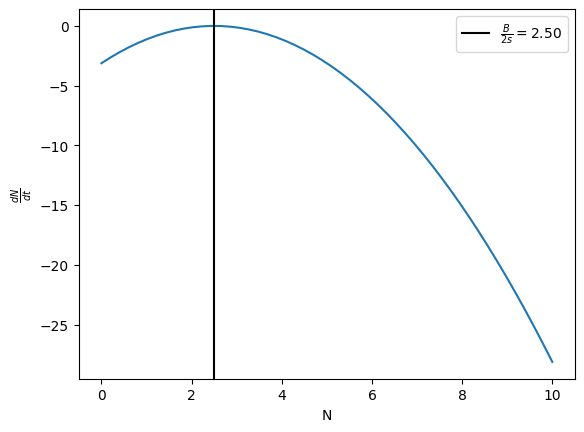

In [9]:
Ns = np.linspace(0, 10)
s = 0.5
B = 2.5
E = B**2 / (4 * s)

plt.plot(Ns, B * Ns - s * Ns * Ns - E)
plt.xlabel("N")
plt.ylabel(r"$\frac{dN}{dt}$")
plt.axvline(x = B / (2 * s), color = 'black', label = r"$\frac{B}{2s} = " + f"{B/(2*s):.2f}$")
plt.legend()
plt.show();

There is only 1 equilibrium.

The equation is:
$$
N = \frac{1}{st - C} + \frac{B}{2s}
$$

<details>
    <summary style="color: blue">$\text{Derivation}$ (Click to expand)</summary>
    <div style="background: aliceblue">
        <p>
	\begin{align*}
	t &= \int \frac{1}{-sN^2 + BN - E} dN \\
	&= -\frac{1}{s} \int \frac{1}{\left(N - \frac{B}{2s}\right)^2} dN \\
	st &= \frac{1}{N - \frac{B}{2s}} + C \\
	{N - \frac{B}{2s}} &= \frac{1}{st - C} \\
	N &= \frac{1}{st - C} + \frac{B}{2s}\\
	N_0 &= -\frac{1}{C} + \frac{B}{2s}\\
	\Rightarrow
	C &= \frac{1}{\frac{B}{2s} - N_0} \\
	QED
	\end{align*}
        </p>
    </div>
</details>

The graph has different behaviour based on the initial population:

If $N_0 < \frac{B}{2s}$, then the population dies out

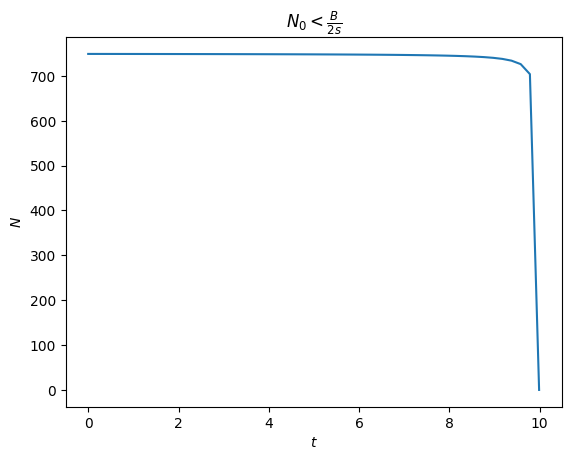

In [10]:
s = 0.1
B = 150
E = B**2 / (4 * s)
N0 = B/2/s - 1
C = 1/(B / 2 / s - N0)

asymptote = C / s - 2 / B
ts = np.linspace(0, asymptote)
Ns = 1/(s * ts - C) + B / (2 * s) 

plt.plot(ts, Ns)
plt.xlabel("$t$")
plt.ylabel("$N$")
plt.title(r"$N_0 < \frac{B}{2s}$")
plt.show()

If $N_0 > \frac{B}{2s}$, then the population dwindles to the equilibrium.

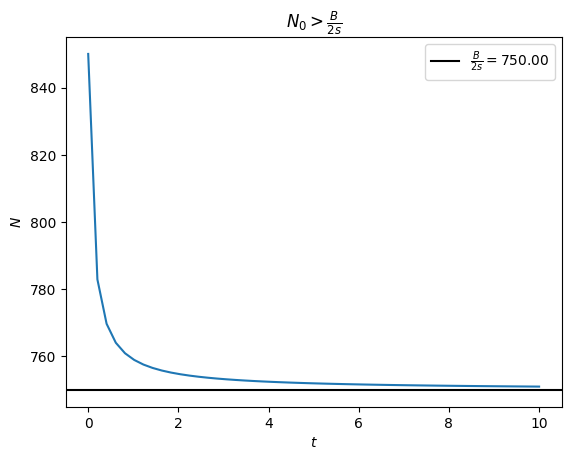

In [11]:
N0 = B/2/s + 100
C = 1/(B / 2 / s - N0)

ts = np.linspace(0, 10)
Ns = 1/(s * ts - C) + B / (2 * s) 
plt.axhline(y = B / (2 * s), color = 'black', label = r"$\frac{B}{2s} = " + f"{B/(2*s):.2f}$")

plt.plot(ts, Ns)
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$N$")
plt.title(r"$N_0 > \frac{B}{2s}$")
plt.show()

In fact, this is simply the [two roots graph](#Two-roots), but when $\beta _1 = \beta _2$.